In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [2]:
import fastai
fastai.__version__

'1.0.60'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
print(os.listdir("/content/gdrive/My Drive/seg_pred"))

['7099.jpg', '7100.jpg', '7106.jpg', '7104.jpg', '7107.jpg', '7110.jpg', '7109.jpg', '7112.jpg', '7115.jpg', '7117.jpg', '7124.jpg', '7119.jpg', '7130.jpg', '7133.jpg', '7137.jpg', '7147.jpg', '7148.jpg', '7149.jpg', '7153.jpg', '7156.jpg', '7158.jpg', '7160.jpg', '7159.jpg', '7161.jpg', '7162.jpg', '7177.jpg', '718.jpg', '7182.jpg', '7186.jpg', '7183.jpg', '7190.jpg', '7187.jpg', '7194.jpg', '72.jpg', '720.jpg', '7210.jpg', '7208.jpg', '7211.jpg', '7213.jpg', '7217.jpg', '7218.jpg', '7219.jpg', '7224.jpg', '7242.jpg', '7230.jpg', '7244.jpg', '7243.jpg', '7249.jpg', '7260.jpg', '7257.jpg', '7266.jpg', '7263.jpg', '7270.jpg', '7269.jpg', '7273.jpg', '7272.jpg', '7279.jpg', '7280.jpg', '7283.jpg', '7296.jpg', '7295.jpg', '7299.jpg', '73.jpg', '7301.jpg', '7304.jpg', '7305.jpg', '7310.jpg', '7312.jpg', '7317.jpg', '7315.jpg', '7316.jpg', '7322.jpg', '732.jpg', '7329.jpg', '7334.jpg', '7335.jpg', '734.jpg', '7348.jpg', '7349.jpg', '7353.jpg', '7352.jpg', '7356.jpg', '736.jpg', '7362.jpg', 

Populating the interactive namespace from numpy and matplotlib


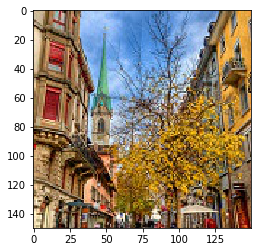

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/gdrive/My Drive/seg_pred/10004.jpg')
imgplot = plt.imshow(img)
plt.show()

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1pFFII4f6vJ_xbAIBSk1vzEeTm24ohjWu'})
download.GetContentFile('seg_train.zip')
!unzip seg_train.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/mountain/7551.jpg  
  inflating: seg_train/mountain/7560.jpg  
  inflating: seg_train/mountain/7565.jpg  
  inflating: seg_train/mountain/7578.jpg  
  inflating: seg_train/mountain/7581.jpg  
  inflating: seg_train/mountain/7586.jpg  
  inflating: seg_train/mountain/7647.jpg  
  inflating: seg_train/mountain/7652.jpg  
  inflating: seg_train/mountain/7654.jpg  
  inflating: seg_train/mountain/7662.jpg  
  inflating: seg_train/mountain/767.jpg  
  inflating: seg_train/mountain/7672.jpg  
  inflating: seg_train/mountain/7679.jpg  
  inflating: seg_train/mountain/7681.jpg  
  inflating: seg_train/mountain/7693.jpg  
  inflating: seg_train/mountain/7695.jpg  
  inflating: seg_train/mountain/7698.jpg  
  inflating: seg_train/mountain/7700.jpg  
  inflating: seg_train/mountain/771.jpg  
  inflating: seg_train/mountain/7715.jpg  
  inflating: seg_train/mountain/7744.jpg  
  inflating: seg_train/mountain/7745.jpg  
  inf

In [0]:
download = drive.CreateFile({'id': '1bgLPkG6xzpeBdxDCnqfXnIte_pwoZZMB'})
download.GetContentFile('seg_test.zip')
!unzip seg_test.zip

In [0]:
tfms = get_transforms(do_flip=False)
path = '/content/seg/'
data = ImageDataBunch.from_folder(path,ds_tfms=tfms, size=100)

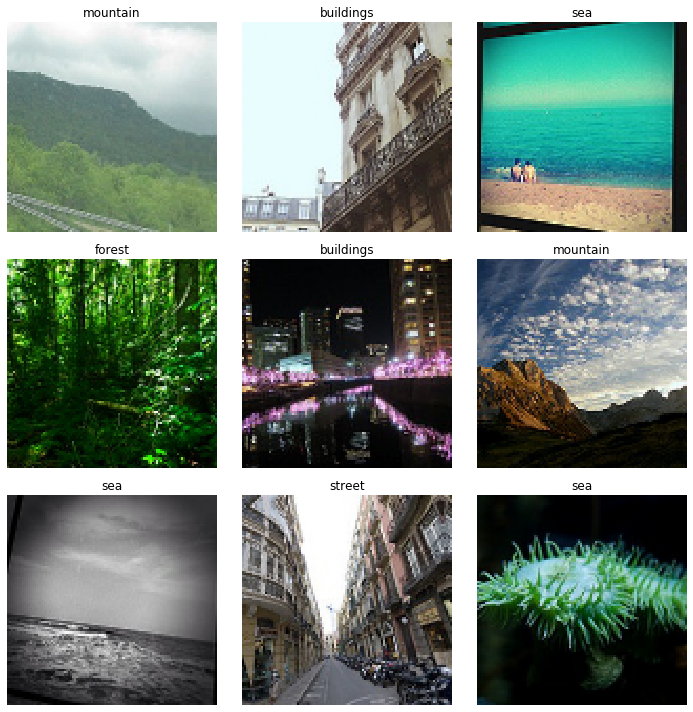

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
my_trained_mod = create_cnn(data, models.resnet34, metrics=accuracy)
my_trained_mod.fit_one_cycle(6)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.764944,0.447967,0.842667,00:55
1,0.529951,0.356301,0.870000,00:53
2,0.410170,0.326395,0.881000,00:53
3,0.348888,0.273631,0.902667,00:53
4,0.311662,0.262405,0.909000,00:51
5,0.284128,0.257857,0.906333,00:51


epoch,train_loss,valid_loss,accuracy,time


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f55c0b66128>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 124, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 50, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/lib/python3.6/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


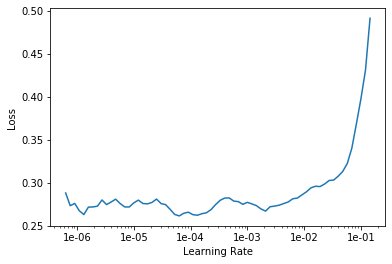

In [0]:
my_trained_mod.lr_find()
my_trained_mod.recorder.plot()

In [0]:
my_trained_mod.fit_one_cycle(6,max_lr = slice(1e-5,1e-03/10))

epoch,train_loss,valid_loss,accuracy,time
0,0.279894,0.257571,0.905333,00:51
1,0.264105,0.256127,0.907667,00:50
2,0.278679,0.257252,0.908000,00:51
3,0.272765,0.255813,0.910333,00:51
4,0.268916,0.250912,0.908000,00:51
5,0.261407,0.254386,0.910333,00:51


In [0]:
my_trained_mod.export()

In [0]:
learn = load_learner('/content/gdrive/My Drive/exports/')

In [0]:
img = open_image('/content/gdrive/My Drive/seg_pred/10004.jpg')


In [0]:
losses = learn.predict(img)
print(losses)

(Category buildings, tensor(0), tensor([7.2143e-01, 3.9312e-04, 2.4588e-04, 4.4213e-04, 5.2875e-06, 2.7748e-01]))
